# Eurostat European Big Data Hackathon 2025 - Team DE 2 - Local Access to Green Space

Lorenz Ade, Melanie Brauchler, Lars Gehrke

<img src="https://cros.ec.europa.eu/system/files/inline-images/EU-Big-Data-Hackathon-2025_horiz_0.jpg" width="500"/>

_Source: https://cros.ec.europa.eu/2025EuropeanBigDataHackathon_

In [1]:
# Utilities
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Access to the relevant statistical data and services (during Hackathon)

For the hackathon, different auxiliary datasets for relevant statistical data and services have been provided to the teams. You can find an overview of the datasets in the documentation of the data catalogue (https://eurostat.github.io/eubd2025_docs/data-catalogue.html#relevant-official-statistics-data-and-services-hackathon-auxiliary-datasets)

To access the relevant datasets during the hackathon, we used information from these notebooks to access the data (https://eurostat.github.io/eubd2025_docs/cf-notebooks/Example_NUTS.html, https://eurostat.github.io/eubd2025_docs/cf-notebooks/Example_Census_GRID.html).

The datasets we accessed through the S3 buckets were: 

1. Territorial units for statistics (NUTS) - NUTS Year 2021 - SHP-Format - Polygons - Scale 01M in projected coordinate system EPSG:3035 (NUTS/2021/NUTS_RG_01M_2021_3035.shp.zip)
2. Census / Population Grid in 1km² resolution with population-related viariables from the Census 2021 - the projection is also EPSG:3035 (Census_GRID/2021/ESTAT_Census_2021_V2.gpkg)

In [2]:
import boto3
import configparser
import os
import urllib3
#import tempfile - since tempfile led to crashing the kernel, we saved the data in fixed folders instead of temporary ones

In [3]:
urllib3.disable_warnings()

In [4]:
# set up Bucket connection

def s3_connection(credentials: dict) -> boto3.session.Session:
    """Establishes a connection to an S3 bucket.

    Args:
        credentials (dict): A dictionary containing AWS S3 credentials with keys 
                            'host_base', 'access_key', and 'secret_key'.

    Returns:
        boto3.session.Session: A boto3 session client configured with the provided 
                               credentials for interacting with the S3 service.
    """
    s3 = boto3.client('s3',
                      endpoint_url=credentials['host_base'],
                      aws_access_key_id=credentials['access_key'],
                      aws_secret_access_key=credentials['secret_key'],
                      use_ssl=True,
                      verify=False)
    return s3

# Load s3 credentials
config = configparser.ConfigParser()
config.read('s3cfg')
credentials = dict(config['default'].items())

# Connection with S3 eodata
s3 = s3_connection(credentials)

In [5]:
response = s3.list_objects_v2(Bucket='ESTAT', Prefix='NUTS')

In [6]:
if 'Contents' in response:
    print("Objects in bucket:")
    # Iterate over each object
    for obj in response['Contents']:
        print(obj['Key'])
else:
    print("No objects found in the bucket.")

Objects in bucket:
NUTS/2021/NUTS_RG_01M_2021_3035.shp.zip
NUTS/2021/NUTS_RG_01M_2021_3857.shp.zip
NUTS/2021/NUTS_RG_01M_2021_4326.shp.zip
NUTS/2024/NUTS_RG_01M_2024_3035.shp.zip
NUTS/2024/NUTS_RG_01M_2024_3857.shp.zip
NUTS/2024/NUTS_RG_01M_2024_4326.shp.zip


In [7]:
object_path = 'NUTS/2021/NUTS_RG_01M_2021_3035.shp.zip'
# Create a local path to save the dataset
local_nuts_path = os.path.join("nuts", object_path.split('/')[-1])

In [8]:
# Download the shapefile from the S3 bucket - uncomment the next line to download the dataset, then, when running the notebook again, keep it as a comment and load from the local path
#s3.download_file('ESTAT', object_path, local_nuts_path)

In [9]:
response = s3.list_objects_v2(Bucket='ESTAT', Prefix='Census_GRID')

In [10]:
if 'Contents' in response:
    print("Objects in bucket:")
    # Iterate over each object
    for obj in response['Contents']:
        print(obj['Key'])
else:
    print("No objects found in the bucket.")

Objects in bucket:
Census_GRID/2021/ESTAT_Census_2021_V2.csv
Census_GRID/2021/ESTAT_Census_2021_V2.gpkg
Census_GRID/2021/ESTAT_Census_2021_V2.parquet
Census_GRID/2021/ESTAT_Census_2021_V2_SDMX_Metadata/CENSUS_INS21ES_A_AT_2021_0000.sdmx.xml
Census_GRID/2021/ESTAT_Census_2021_V2_SDMX_Metadata/CENSUS_INS21ES_A_BE_2021_0000.sdmx.xml
Census_GRID/2021/ESTAT_Census_2021_V2_SDMX_Metadata/CENSUS_INS21ES_A_BG_2021_0000.sdmx.xml
Census_GRID/2021/ESTAT_Census_2021_V2_SDMX_Metadata/CENSUS_INS21ES_A_CH_2021_0000.sdmx.xml
Census_GRID/2021/ESTAT_Census_2021_V2_SDMX_Metadata/CENSUS_INS21ES_A_CY_2021_0000.sdmx.xml
Census_GRID/2021/ESTAT_Census_2021_V2_SDMX_Metadata/CENSUS_INS21ES_A_CZ_2021_0000.sdmx.xml
Census_GRID/2021/ESTAT_Census_2021_V2_SDMX_Metadata/CENSUS_INS21ES_A_DE_2021_0000.sdmx.xml
Census_GRID/2021/ESTAT_Census_2021_V2_SDMX_Metadata/CENSUS_INS21ES_A_DK_2021_0000.sdmx.xml
Census_GRID/2021/ESTAT_Census_2021_V2_SDMX_Metadata/CENSUS_INS21ES_A_EE_2021_0000.sdmx.xml
Census_GRID/2021/ESTAT_Census_2

In [11]:
object_path = 'Census_GRID/2021/ESTAT_Census_2021_V2.gpkg' # 1.6GB
# Define local path to save GeoPackage file
local_grid_path = os.path.join("census_grid", object_path.split('/')[-1])

In [12]:
# Download the GeoPackage from the S3 bucket - uncomment the next line to download the dataset, then, when running the notebook again, keep it as a comment and load from the local path
#s3.download_file('ESTAT', object_path, local_grid_path)

## Access to the relevant statistical data and services (continued access)

Since the statistical data and services provided during the hackathon are official and open data, you can download the relevant datasets through the dedicated Eurostat websites in case you do not have access to the S3-Buckets for the Hackathon anymore. 

1. Territorial units for statistics https://ec.europa.eu/eurostat/web/gisco/geodata/statistical-units/territorial-units-statistics (19.2 MB ZIP file - no need to unpack)
2. Census / Population Grid https://ec.europa.eu/eurostat/web/gisco/geodata/population-distribution/geostat (562 MB ZIP file - unpacked *ESTAT_Census_2021_V2.gpkg 1.6 GB*)

To access them via the notebook, you can upload them to your `mystorage` folder of your jupyter environment. We have put them into dedicated folders `nuts` and `census_grid` when we downloaded them during the hackathon. If you run your notebook in your main `mystorage` folder and also create the other folders there, you will be able to run the following code without changes. 

### Load NUTS dataset

In [13]:
import geopandas as gpd

In [14]:
# Read the nuts shapefile into a GeoDataFrame
nuts_gdf = gpd.read_file(local_nuts_path)

In [15]:
# Check the attributes 
nuts_gdf.head(2) 

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,geometry
0,AL,0,AL,Shqipëria,Shqipëria,0.0,0,0,"MULTIPOLYGON (((5121233.536 2221719.441, 51208..."
1,CZ,0,CZ,Česko,Česko,0.0,0,0,"POLYGON ((4624843.654 3112209.741, 4625546.618..."


We are using the NUTS dataset to filter the Census Grid by bounding box of a NUTS region - we can then set geopandas to only load the relevant data in this bounding box. 
For example, the NUTS_ID for NUTS 0 region Germany is `DE`, the NUTS_ID for NUTS 2 region Düsseldorf is `DEA1`. 

During the Hackathon, we decided on two focus regions on a NUTS 2 level. 

* Düsseldorf `DEA1` in Germany (including Essen etc.)
* Eastern and Midland `IE04` in Ireland (including Dublin)

In [16]:
# from here on, we run the notebook two times - once for DEA1 and once for IE04
nuts_aoi = nuts_gdf[(nuts_gdf['NUTS_ID']=='DEA1')]
#nuts_aoi = nuts_gdf[(nuts_gdf['NUTS_ID']=='IE06')]

In [17]:
nuts_aoi

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,geometry
190,DEA1,2,DE,Düsseldorf,Düsseldorf,0.0,0,0,"POLYGON ((4056610.125 3206393.097, 4057168.851..."


In [18]:
# bounding box of the whole GeoDataFrame
nuts_aoi.total_bounds

array([4041623.8874, 3105596.1421, 4133347.9473, 3206393.0969])

In [19]:
# The bbox needs to be a tuple to be passed to the read_file function
bbox = tuple(nuts_aoi.total_bounds)

### Load Census Grid dataset with NUTS bbox

In [20]:
# Read the census grid into a Pandas GeoDataFrame by bounding box of the NUTS area
gdf_grid = gpd.read_file(local_grid_path,
                        bbox=bbox)

In [21]:
# now we can check how many grid cells the grid has for the bounding box of the selected NUTS region
gdf_grid.shape
# Düsseldorf - 9486 cells
# Eastern and Midland - 21269 cells

(9486, 18)

## Access to satellite data with the CDSE (Entry point SentinelHub)

To access the relevant satellite data to be calculated for each of the Census Grid Cells for Düsseldorf and Eastern & Midland, we make use of the CDSE capabilities and SentinelHub

### Authentication

You can obtain the credentials for the Sentinel Hub services (`client_id` & `client_secret`) in your [Dashboard](https://shapps.dataspace.copernicus.eu/dashboard/#/). In the user settings, you can create a new OAuth client to generate these credentials. You can find more detailed instructions on the corresponding [documentation page](https://documentation.dataspace.copernicus.eu/APIs/SentinelHub/Overview/Authentication.html).

In [22]:
import getpass
# in addition to the sentinelhub authentification modules, we also load a few other things for later
from sentinelhub import (
    SHConfig,
    BBox,
    bbox_to_dimensions,
    DataCollection,
    #SentinelHubCatalog,
    SentinelHubRequest,
    #SentinelHubStatistical,
    MimeType,
    Geometry,
    CRS,
)

In [23]:
# Enter your own credentials here
sh_id = getpass.getpass("Enter your username")
sh_secret = getpass.getpass("Enter your password")

Enter your username ········
Enter your password ········


In [24]:
config = SHConfig()
config.sh_client_id = sh_id
config.sh_client_secret = sh_secret
config.sh_base_url = 'https://sh.dataspace.copernicus.eu'
config.sh_token_url = 'https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token'

## Get quarterly Sentinel-2 mosaic from SentinelHub by collection-ID

The sentinel quarterly mosaics are created by mosaicking three months of Sentinel-2 Level 2A aquisitions for the Bands B02, B03, B04, B08 (B, G, R, IR) to create cloud free mosaics.
https://documentation.dataspace.copernicus.eu/Data/SentinelMissions/Sentinel2.html#sentinel-2-level-3-quarterly-mosaics

The sentinel cloudless mosaics (level 3) are available as a byoc collection, that needs to be accessed by the given ID via SentinelHub.
https://documentation.dataspace.copernicus.eu/Data/SentinelMissions/Sentinel2.html#access-sentinel-2-level-3-quarterly-mosaics-with-sentinel-hub

In [25]:
# get the collection by collection ID
S2l3_cloudless_mosaic = DataCollection.define_byoc(
    collection_id="5460de54-082e-473a-b6ea-d5cbe3c17cca"
)

The following Evalscript calculates the NDVI from the Sentinel-2 Mosaic and evaluates per pixel if the NDVI is over or below the threshold of 0.6. 

* Dense vegetation - Greater than or equal to 0.6
* Moderate vegetation - In the range [0.4, 0.6)
* Sparse vegetation - In the range [0.2 0.4)
* No vegetation - Below 0.2

Since we take the threshold of 0.6 for dense vegetation, we may underestimate the green space per grid cell, especially in the late summer months. 

(https://www.mathworks.com/help/images/identify-vegetation-regions-using-interactive-ndvi-thresholding.html) 

In [26]:
#Define evalscript for NDVI calculation
evalscript = """
//VERSION=3
function setup() {
    return {
        input: [{bands: ["B04", "B08"], units: "DN"}],
        output: {bands: 1, sampleType: "FLOAT32"}
    };
}

function evaluatePixel(sample) {
    let ndvi = (sample.B08 - sample.B04) / (sample.B08 + sample.B04);
    return ndvi < 0.6 ? [0] : [1];
    //return [ndvi];
}
"""

In [27]:
bounds_tuples = [(row["minx"], row["miny"], row["maxx"], row["maxy"]) for _, row in gdf_grid.bounds.iterrows()]

In [28]:
gdf_grid["bounds"] = bounds_tuples

The function below iterates through each grid cell of the census grid and retrieves the NDVI for the quarter July 2021 - September 2021, but only if there is population in the census grid. If a grid cell has a share of 50% invalid values of Sentinel-2 (i.e., remaining clouds even in the mosaic), they are also marked. 
The resulting values can thus be: 

* -2 -> No population present
* -1 -> not enough valid NDVI pixels
* any other value 0-1 -> sum of pixels in the grid over the NDVI threshold of 0.6 / sum of valid pixels

In hindsight, this would probably be better done with the statistical API or batch processing capacities. 

In [29]:
def get_ndvi_stats(gdf):
    
    result=[]
    
    for _, row in gdf.iterrows():
        if row["POPULATED"] != 1:
            result.append(-2)
            continue
        
        bbox = BBox(bbox=row["bounds"], crs="EPSG:3035")
        
        bbox_size = bbox_to_dimensions(bbox, resolution=10)  # 10m resolution
    
        request = SentinelHubRequest(
            evalscript=evalscript,
            input_data=[SentinelHubRequest.input_data(
                data_collection=S2l3_cloudless_mosaic,
                time_interval=("2021-07-01", "2021-07-02"),
            )],
            responses=[SentinelHubRequest.output_response("default", MimeType.TIFF)],
            bbox=bbox,
            size=bbox_size,
            config=config,
        )

        response = request.get_data()
        #total_pixels = response[0].size # if you want to check how many pixels are reported back
        valid_pixels = np.count_nonzero(~np.isnan(response[0]))
        ndvi_pixels = (response[0]==1).sum()
    
        # compute area and share of ndvi pixels above treshold
        share = ndvi_pixels/valid_pixels if valid_pixels > 5000 else -1
        result.append(share)

    return result

In [30]:
# run the function
ndvi_grid = get_ndvi_stats(gdf_grid)

In [34]:
gdf_grid["share_vegetation"] = ndvi_grid

<Axes: ylabel='Frequency'>

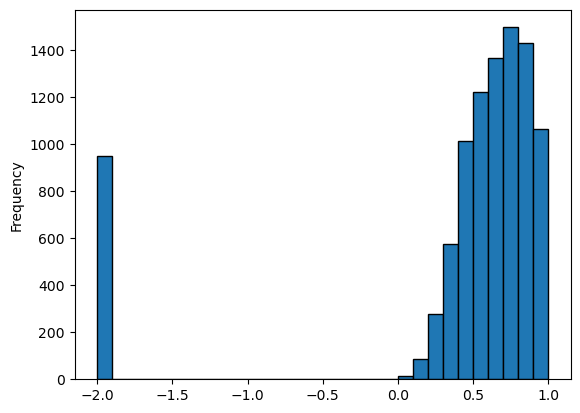

In [35]:
gdf_grid['share_vegetation'].plot.hist(bins=30, edgecolor="black")

We see there are no cells evaluated as having too many invalid pixels, but in the Düsseldorf NUTS2 region, we have over 900 cells that are not inhabited (Value = -2). 

## Green Space per Capita

With these vegetation share values and the population in the Census grid, we can calculate the local green space per capita for each grid cell of the Census 2021. 

In [36]:
gdf_grid.head(2)

,GRD_ID,T,M,F,Y_LT15,Y_1564,Y_GE65,EMP,NAT,EU_OTH,OTH,SAME,CHG_IN,CHG_OUT,LAND_SURFACE,POPULATED,CONFIDENTIALSTATUS,geometry,bounds,share_vegetation
0,CRS3035RES1000mN3105000E4041000,196,95,99,26,131,41,NaN,155,27,15,185,11,3,1.0,1,NaN,"POLYGON ((4041000 3105000, 4042000 3105000, 40...","(4041000.0, 3105000.0, 4042000.0, 3106000.0)",0.488649
1,CRS3035RES1000mN3105000E4042000,77,39,37,18,49,15,NaN,54,13,11,69,0,3,1.0,1,NaN,"POLYGON ((4042000 3105000, 4043000 3105000, 40...","(4042000.0, 3105000.0, 4043000.0, 3106000.0)",0.523852


In [37]:
# There are records in the dataset that don't have any population count (0) but are still considered as POPULATED = 1
gdf_grid[gdf_grid['T'] == 0]["POPULATED"].unique()

array([0, 1])

In [38]:
# We need to account for his in the share calculation, since we cannot divide by 0
gdf_grid['share_veg_cap'] = (gdf_grid['share_vegetation']) / gdf_grid['T'].replace(0, np.nan)

In [39]:
# like in the vegetation share calculation before, we set the non-populated areas to the value -2
gdf_grid.loc[gdf_grid['POPULATED'] == 0, 'share_veg_cap'] = -2

<Axes: ylabel='Frequency'>

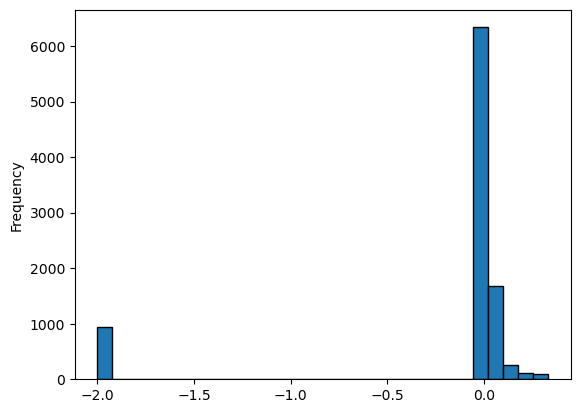

In [40]:
gdf_grid['share_veg_cap'].plot.hist(bins=30, edgecolor="black")

In [41]:
# POPULATESD grid cells that still currently don't count 1 person are kept as NA
gdf_grid['share_veg_cap'].isna().sum()

64

## Export the datasets for visualization in GridViz 

We decided to use the GRD_ID of the census grid 2021 as a join field in our data exchange and export the values as non-geospatial tables in a compressed parquet format

In [44]:
# Select only the two columns you need to export
gdf_subset = gdf_grid[['GRD_ID', 'share_vegetation']]

# Export to Parquet
#gdf_subset.to_parquet("nuts2duesseldorf_vegshare.parquet", engine="pyarrow", compression="snappy")

In [45]:
gdf_subset.head(2)

,GRD_ID,share_vegetation
0,CRS3035RES1000mN3105000E4041000,0.488649
1,CRS3035RES1000mN3105000E4042000,0.523852


In [47]:
# Select only the two columns you need to export
gdf_subset = gdf_grid[['GRD_ID', 'share_veg_cap']]

# Export to Parquet
#gdf_subset.to_parquet("nuts2duesseldorf_veg_capita.parquet", engine="pyarrow", compression="snappy")

In [48]:
gdf_subset.head(2)

,GRD_ID,share_veg_cap
0,CRS3035RES1000mN3105000E4041000,0.002493
1,CRS3035RES1000mN3105000E4042000,0.006803


We can now use the resulting values (vegetation share per 1km² and vegetation share per capita in 1km²) to be visualized with the GridViz library!